### ln_g = 0.02 + 0.02ε + ν

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
nu_prob = 0.983
n_simulations = 10000
nu_disaster = np.log(0.65)

In [3]:
epsilon =\
(
    np
    .random
    .normal(0, 1, n_simulations)
)

In [4]:
nu =\
(
    np
    .where(np.random.uniform(0, 1, n_simulations) > nu_prob, nu_disaster, 0)
)

In [5]:
ln_g =\
(
    0.02 + 0.02*epsilon + nu
)

In [6]:
g =\
(
    np
    .exp(ln_g)
)

In [7]:
gamma =\
(
    np
    .arange(1,
            4.1,
            0.1)
)

In [8]:
volatility_ratio = []

In [9]:
for i in gamma:
    M =\
    (
        0.99 * g **(-i)
    )
    
    M_mean =\
    (
        np
        .mean(M)    
    )
    
    M_std =\
    (
        np
        .std(M) 
    )
    
    vol_r =\
    (
        M_std
        /
        M_mean
    )
    
    volatility_ratio.append(vol_r)

In [15]:
vol_ratio_df = pd.DataFrame(data=volatility_ratio).rename(columns={0:"ratio"})

In [16]:
vol_ratio_df

,ratio
0,0.071356
1,0.080115
2,0.089221
3,0.098688
4,0.108532
5,0.118767
6,0.129410
7,0.140478
8,0.151986
9,0.163953


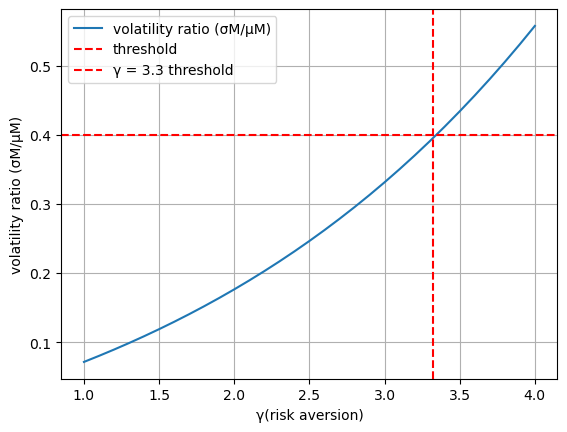

In [17]:
plt\
    .plot(gamma, vol_ratio_df, label='volatility ratio (σM/μM)')

plt\
    .axhline(y =0.4, color = 'red', linestyle = '--', label = 'threshold')

plt\
    .axvline(x=3.32, color='red', linestyle='--', label='γ = 3.3 threshold')

plt\
    .xlabel('γ(risk aversion)')

plt\
    .ylabel('volatility ratio (σM/μM)')

plt\
    .legend()

plt\
    .grid()

In [18]:
gamma_threshold = gamma[np.where(np.array(vol_ratio_df) >= 0.4)[0][0]]
print(f"The smallest value of γ where σM / μM > 0.4 is {gamma_threshold:.2f}")

The smallest value of γ where σM / μM > 0.4 is 3.40


In [20]:
index_of_volatility_ratio = vol_ratio_df[vol_ratio_df.ratio>0.4].idxmin()
smallest_corresponding_gamma_value = gamma[index_of_volatility_ratio]

In [22]:
smallest_corresponding_gamma_value

array([3.4])